<a href="https://colab.research.google.com/github/leoquiroa/Prophet/blob/master/RevenuePerDoctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

from datetime import date
import holidays

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

Read file


In [0]:
def read_raw_csv(url,nrows):
  df_doc = pd.read_csv(
      url, 
      nrows=nrows,
      names = ['ds','cat','y'], 
      parse_dates = True )
  df_doc['ds'] = pd.to_datetime(df_doc['ds'])
  return df_doc

Filter by

In [0]:
def filter_by(df_doc, name_doc):
  return df_doc[df_doc['cat'] == name_doc][['ds','y']].reset_index(drop=True)

Split Train/Test


In [0]:
def split_train_test(df_filter, date_start_test):
  split_point = df_filter[df_filter['ds']==date_start_test].index[0]
  train = df_filter[:split_point]
  test = df_filter[split_point:]
  return [train, test]

Compare Real vs Prediction


In [0]:
def compare_dates(date_begin, date_end, data):
  yhat = forecast[(forecast['ds'] >= date_begin) & (forecast['ds'] <= date_end)][['ds','yhat']][['ds','yhat']]
  yreal = data[(data['ds'] >= date_begin) & (data['ds'] <= date_end)]
  merged_inner = pd.merge(left=yreal,right=yhat, left_on='ds', right_on='ds')
  return merged_inner

Get Holidays

In [0]:
def get_df_holidays(year_list):
  us_holidays = holidays.UnitedStates()
  mylist = []
  for date, name in sorted(holidays.US(years=year_list).items()):
    mylist.append((name,date,0,0))
  df_holidays = pd.DataFrame(mylist, columns = ['holiday' , 'ds', 'lower_window' , 'upper_window'])

# July 4th

In [0]:
url = 'https://raw.githubusercontent.com/leoquiroa/Prophet/master/data/daily_revenue_doctor.csv'
df_doc = read_raw_csv(url, 4167)
df_filter = filter_by(df_doc, 'Robert Caputo')
[train,test] = split_train_test(df_filter, '2019-07-01')

Fit Model No Holidays


In [278]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=28, freq='d')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


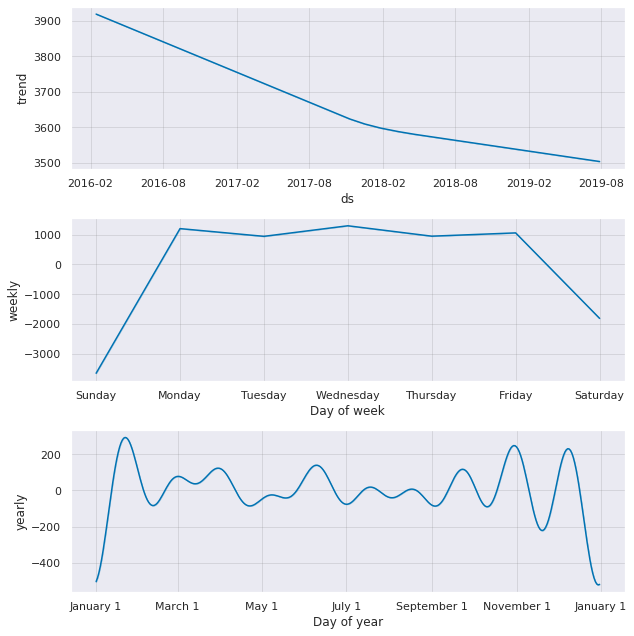

In [0]:
fig_decompose = m.plot_components(forecast)

In [0]:
compare_dates('2019-07-02', '2019-07-06', test)

,ds,y,yhat
0,2019-07-02,4166.43,4379.261961
1,2019-07-03,4183.69,4736.271230
2,2019-07-04,0.00,4389.116727
3,2019-07-05,3338.40,4504.644280
4,2019-07-06,1874.83,1633.851616


Fit Model With Holidays


In [0]:
df_holidays = get_df_holidays([2016,2017,2018,2019])
m = Prophet(holidays=df_holidays,daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)
future = m.make_future_dataframe(periods=31, freq='d')
forecast = m.predict(future)

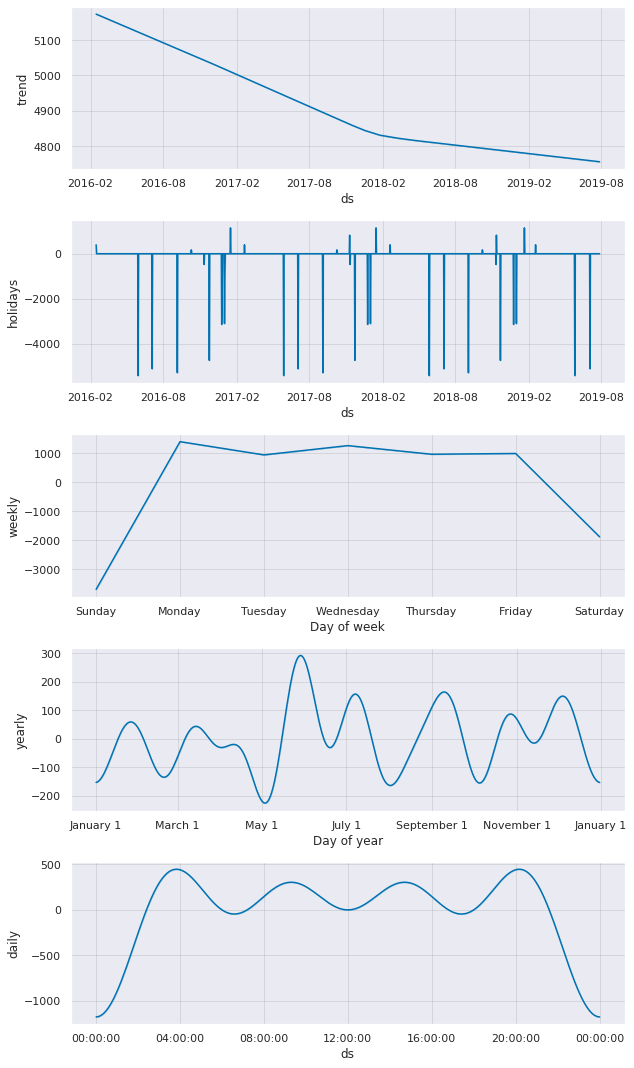

In [0]:
fig_decompose = m.plot_components(forecast)

In [0]:
compare_dates('2019-07-02', '2019-07-06', test)

,ds,y,yhat
0,2019-07-02,4166.43,4643.498570
1,2019-07-03,4183.69,4975.756160
2,2019-07-04,0.00,-436.833319
3,2019-07-05,3338.40,4723.869639
4,2019-07-06,1874.83,1857.664766


In [0]:
real = test[(test['ds']>='2019-07-01') & (test['ds']<='2019-07-31')][['ds','y']]

In [0]:
predict = forecast[(forecast['ds']>='2019-07-01') & (forecast['ds']<='2019-07-31')][['ds','yhat_lower','yhat','yhat_upper']]

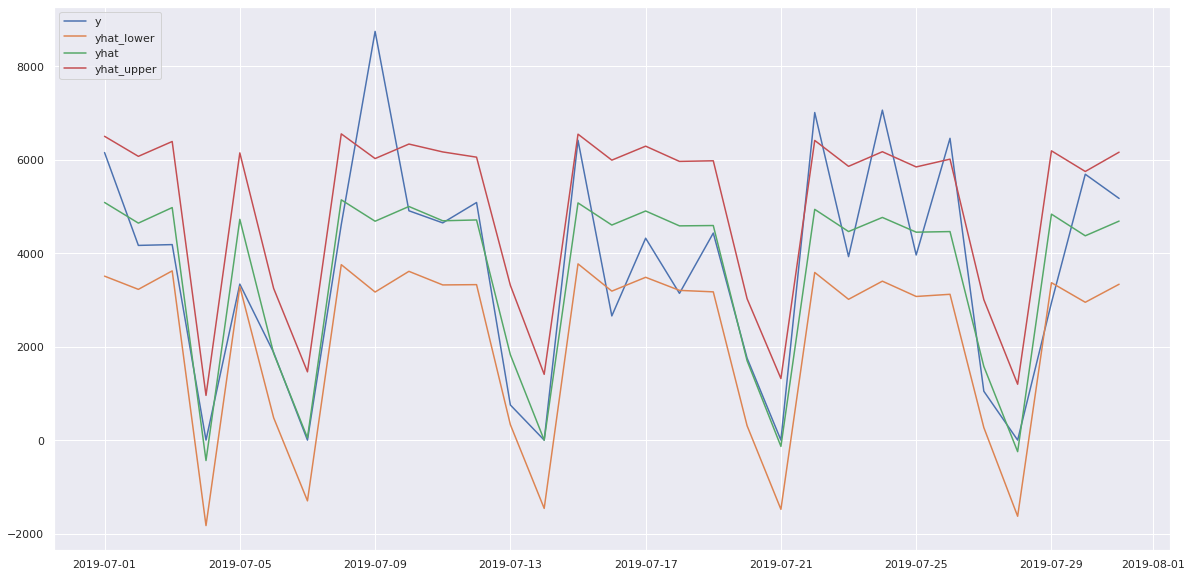

In [311]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(real['ds'], real['y'], label='y')
plt.plot(predict['ds'], predict['yhat_lower'], label='yhat_lower')
plt.plot(predict['ds'], predict['yhat'], label='yhat')
plt.plot(predict['ds'], predict['yhat_upper'], label='yhat_upper')
plt.legend(loc="upper left")

# November 23th

In [0]:
url = 'https://raw.githubusercontent.com/leoquiroa/Prophet/master/data/daily_revenue_doctor.csv'
df_doc = read_raw_csv(url, 4167)
df_filter = filter_by(df_doc, 'Robert Caputo')
[train,test] = split_train_test(df_filter, '2019-11-04')

In [0]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=30, freq='d')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
compare_dates('2019-11-26', '2019-11-30', test)

,ds,y,yhat
0,2019-11-26,7871.19,4870.515108
1,2019-11-27,6131.85,5210.955003
2,2019-11-28,0.00,4888.780369
3,2019-11-29,0.00,5092.409331
4,2019-11-30,0.00,2206.622137


In [0]:
df_holidays = get_df_holidays([2016,2017,2018,2019])
m = Prophet(holidays=df_holidays,daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)
future = m.make_future_dataframe(periods=31, freq='d')
forecast = m.predict(future)

In [0]:
compare_dates('2019-11-26', '2019-11-30', test)

,ds,y,yhat
0,2019-11-26,7871.19,5181.780999
1,2019-11-27,6131.85,5469.360818
2,2019-11-28,0.00,455.484239
3,2019-11-29,0.00,5272.800582
4,2019-11-30,0.00,2363.624197


In [0]:
predict = forecast[forecast['ds']>='2019-11-04'][['ds','yhat_lower','yhat','yhat_upper']]
predict.head()

,ds,yhat_lower,yhat,yhat_upper
1358,2019-11-04,4216.256890,5608.736947,6927.697047
1359,2019-11-05,3797.898063,5144.969425,6644.441984
1360,2019-11-06,3877.900211,5377.225944,6993.649852
1361,2019-11-07,3635.567734,5054.715959,6614.351389
1362,2019-11-08,3629.613234,5086.843276,6550.180384


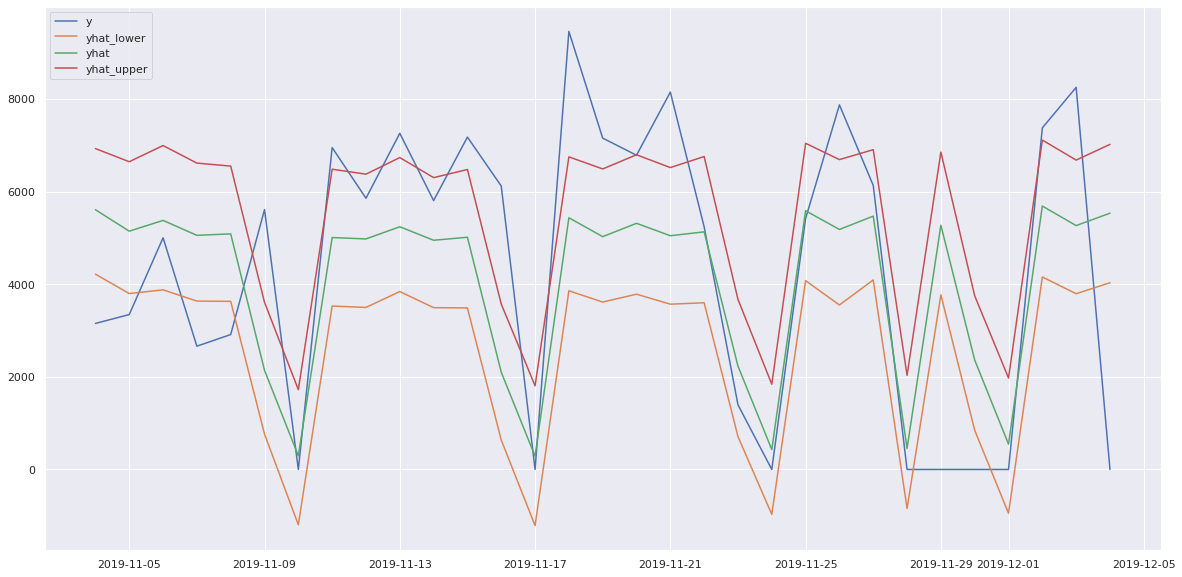

In [277]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(test['ds'], test['y'], label='y')
plt.plot(predict['ds'], predict['yhat_lower'], label='yhat_lower')
plt.plot(predict['ds'], predict['yhat'], label='yhat')
plt.plot(predict['ds'], predict['yhat_upper'], label='yhat_upper')
plt.legend(loc="upper left")